<a href="https://colab.research.google.com/github/p4arth/Statistics/blob/main/EDAonMeteroiteData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Meteorite data.xlsx - meteorite-landings.csv')

In [3]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
data.shape

(45716, 10)

In [5]:
data['mass'].loc[0:10000]

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
9996         32.9
9997          1.5
9998         12.7
9999         14.5
10000        18.5
Name: mass, Length: 10001, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


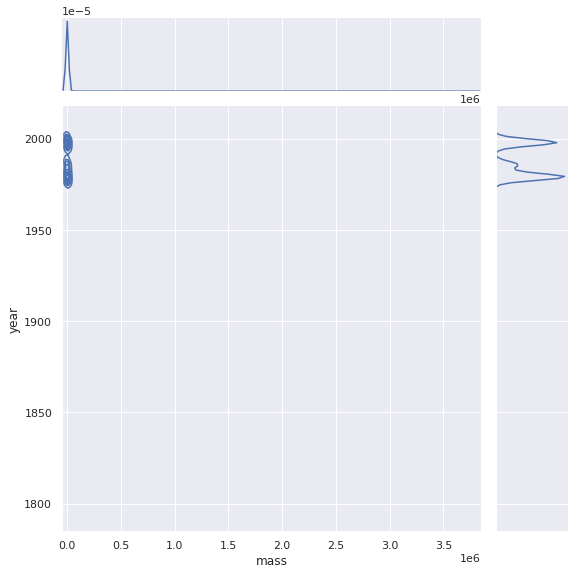

In [6]:
from matplotlib.pyplot import figure
sns.set()
sns.jointplot(x = data['mass'].loc[40000:] , y = data['year'].loc[40000:], kind = 'kde', height=8, aspect=15)
plt.show()

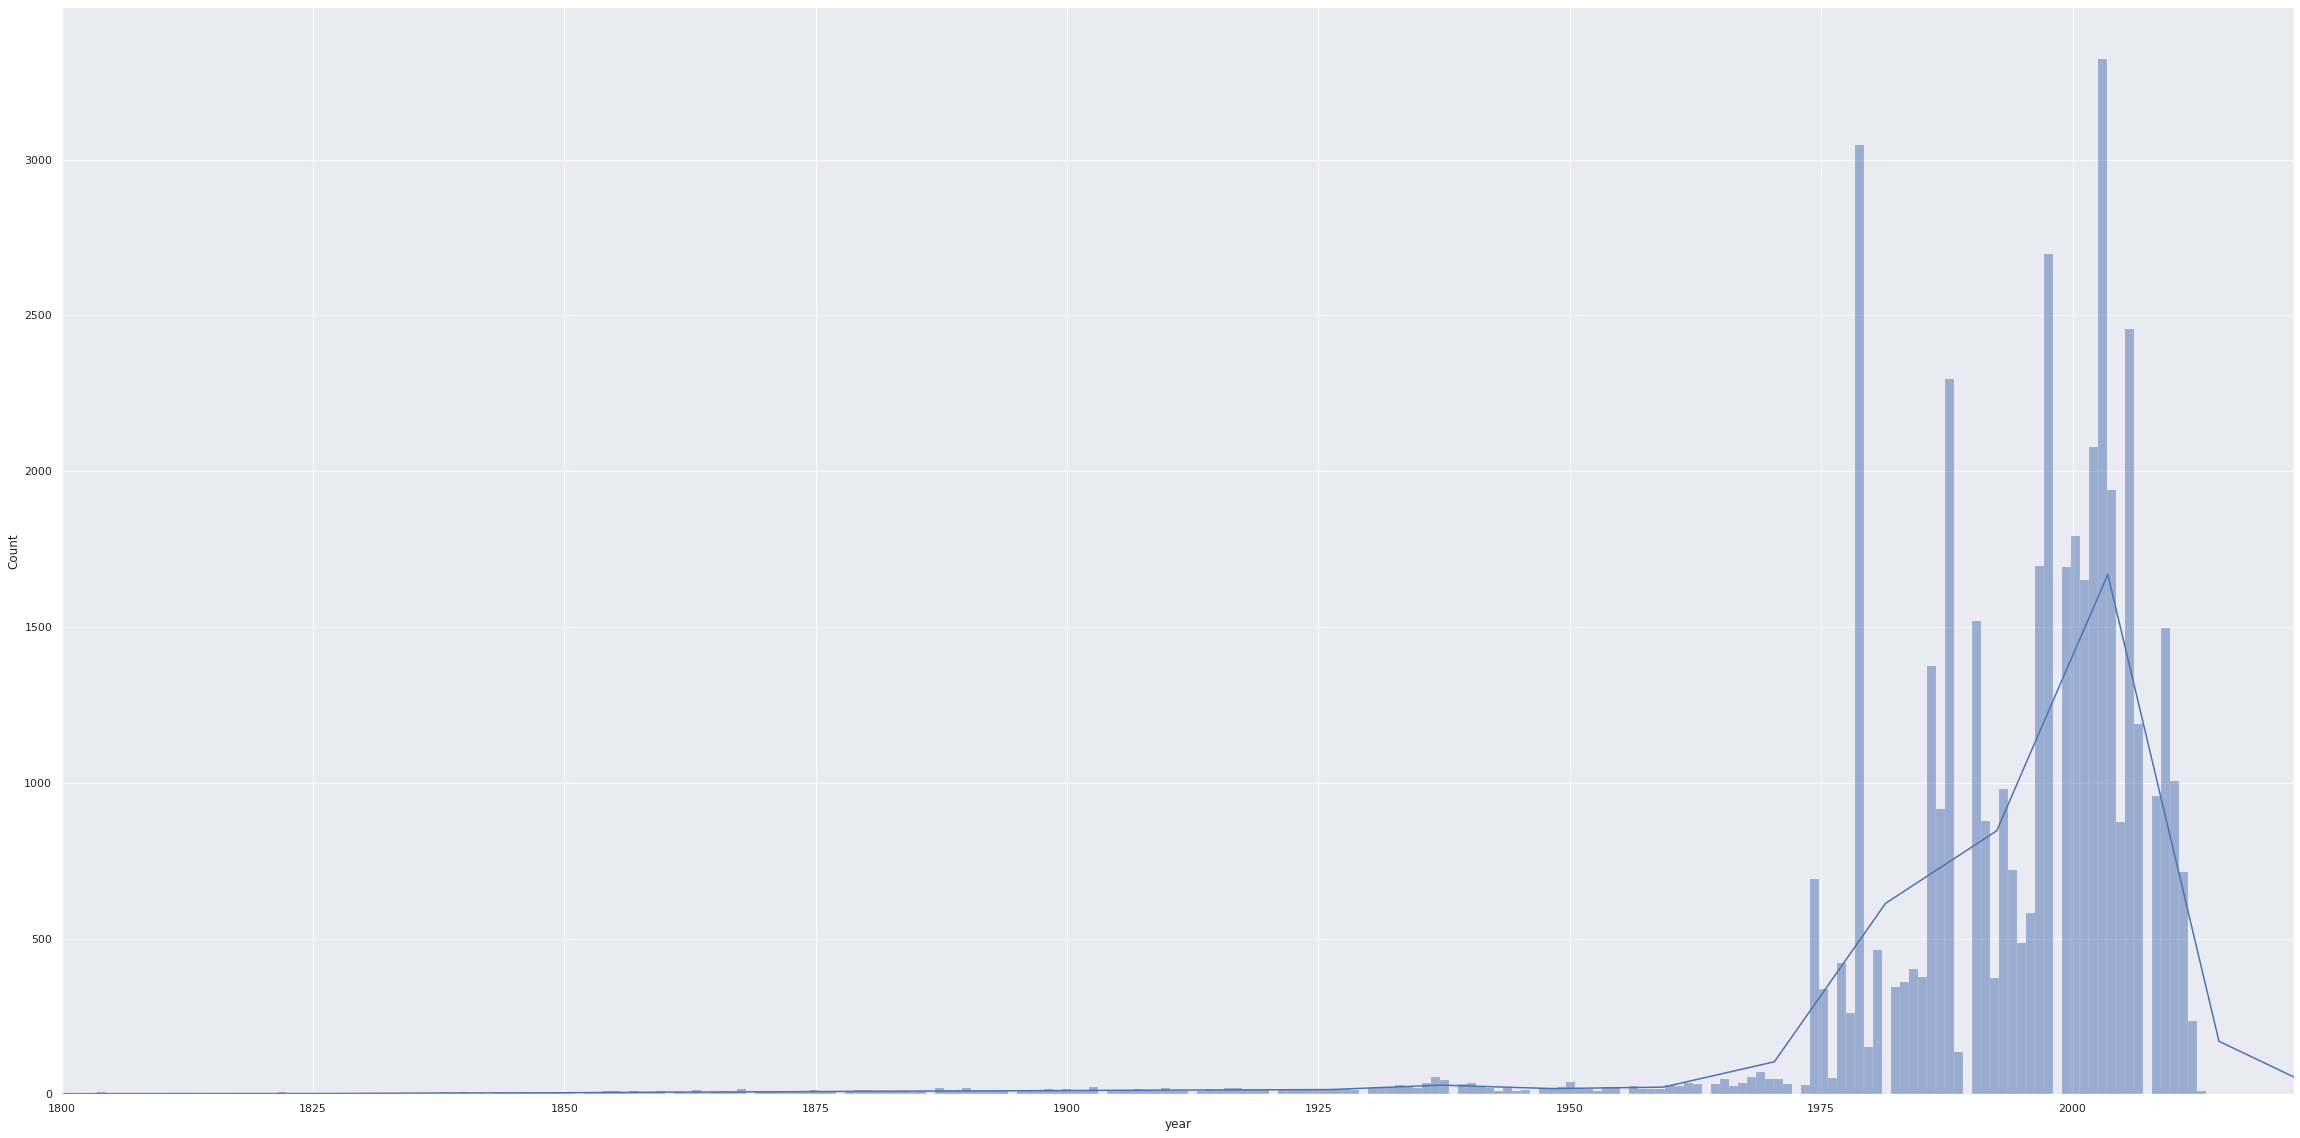

In [47]:
fig, ax = plt.subplots(figsize=(40, 20))
plot = sns.histplot(data['year'],kde=True)
plot.set_xlim(1800, 2022)
plt.show()
# Graph is hightly skewed towards the right
# Probably because there we not enough instruments to measure meteorites during the early 80's-90's

Sampling masses to verify the Central Limit Theorem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


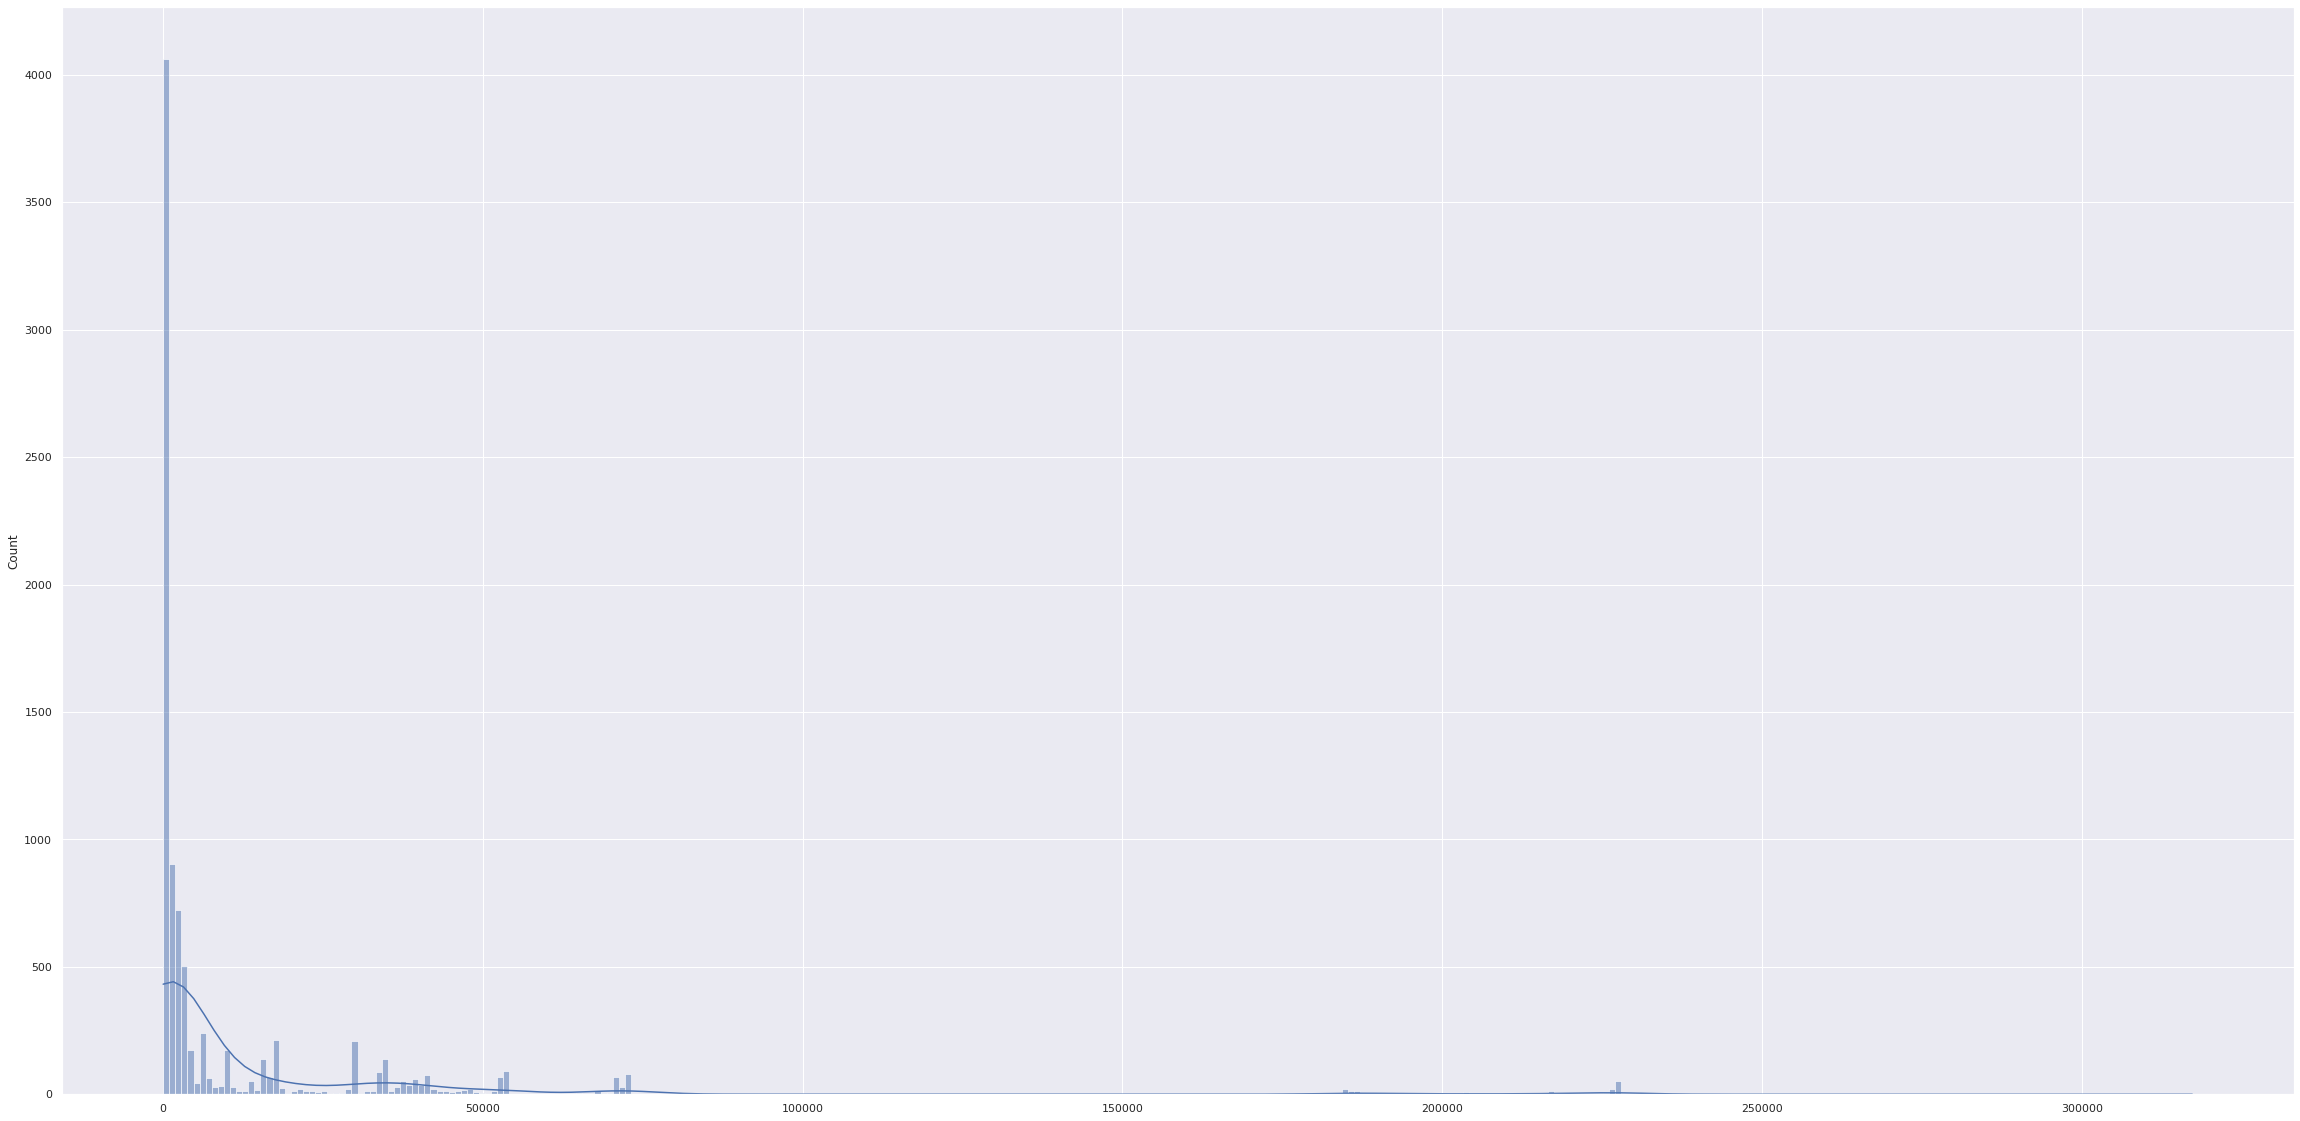

In [50]:
import random

mean_masses = []
for i in range(0,len(data),5):
  ind2 = 1000+i
  mass_list = [x for x in data['mass'].loc[i+1:ind2]]
  mean_masses.append(np.nanmean(mass_list))

# Plotting the histogram of mean of iid samples of asteroid masses
fig, ax = plt.subplots(figsize=(40, 20))
sns.histplot(mean_masses, kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


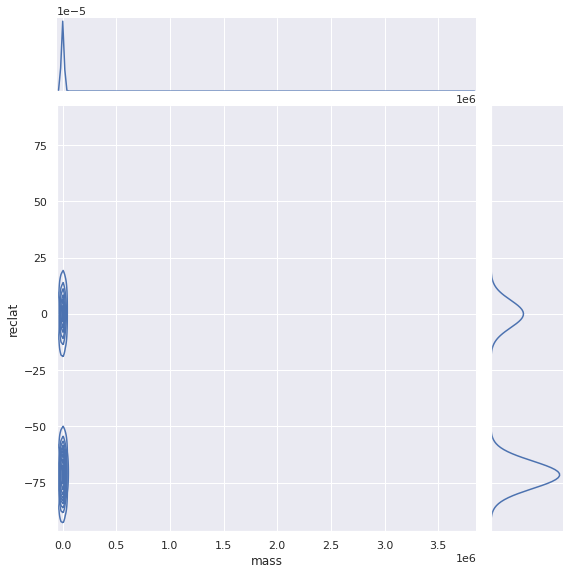

In [51]:
sns.set()
sns.jointplot(x = data['mass'].loc[40000:] , y = data['reclat'].loc[40000:], kind = 'kde', height=8, aspect=15)
plt.show()